In [1]:
import numpy as np
import matplotlib.pyplot as plt

## 4.7)a)
Beneath is the code to plot the region of absolute stability, first I define the space I will be working in, then compute the stability function and plot the actual region onto a graph.

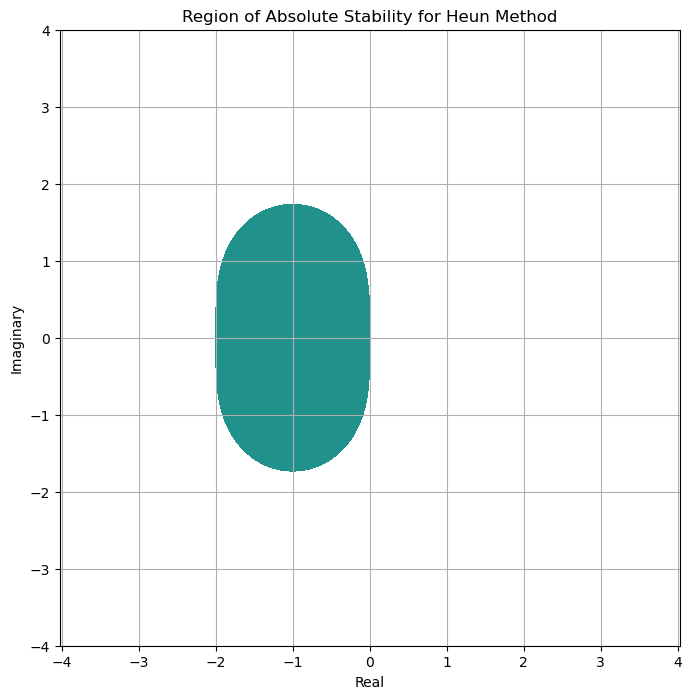

In [2]:
def heun_stab_reg(num_points=1000):
    # Define the real and imaginary numberlines
    real_nline = np.linspace(-4, 4, num_points)
    imag_nline = np.linspace(-4, 4, num_points)
    
    # Combine the numberlines to create a complex 
    real_grid, imag_grid = np.meshgrid(real_nline, imag_nline)
    complex_grid = real_grid + 1j * imag_grid

    # Compute Heun's methodstability function
    R = 1 + complex_grid + 0.5 * complex_grid**2

    # Plot the region of absolute stability
    plt.figure(figsize=(8, 8))
    plt.contourf(real_nline, imag_nline, np.abs(R), levels=[0, 1])
    plt.title('Region of Absolute Stability for Heun Method')
    plt.xlabel('Real')
    plt.ylabel('Imaginary')
    plt.grid(True)
    plt.axis('equal')
    plt.show()

# Plot the region of absolute stability
heun_stab_reg()

Heun's Method is not A-stable because the it is only absolutely stable when -2<Re(z)<0.


## 4.7)b)
Beneath is the code to plot a graph of absolute stability for the Runge-Kutta method defined in 4.6.

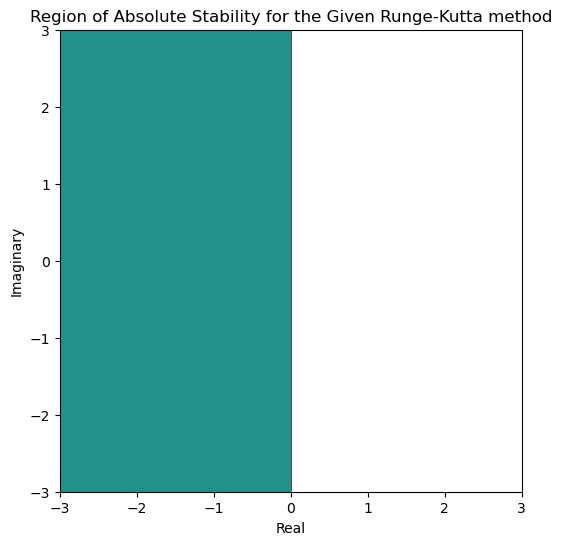

In [3]:
def plot_rk46_stability_region(resolution=500):
    # Create a space of complex numbers (z = x + iy)
    x = np.linspace(-3, 3, resolution)
    y = np.linspace(-3, 3, resolution)
    X, Y = np.meshgrid(x, y)
    Z = X + 1j * Y

    # Compute the stability function R(z) for RK4
    R_z = (12 + 6 * Z + Z ** 2)/(12 - 6 * Z + Z ** 2)

    # Plot the stability region where |R(z)| <= 1
    plt.figure(figsize=(8, 6))
    plt.contourf(X, Y, np.abs(R_z), levels=[0, 1], extend='neither')
    plt.title('Region of Absolute Stability for the Given Runge-Kutta method')
    plt.xlabel('Real')
    plt.ylabel('Imaginary')
    plt.axis('scaled')

    # Adding a contour to highlight the boundary |R(z)| = 1
    plt.contour(X, Y, np.abs(R_z), levels=[1], colors='black', linewidths=0.5)

    plt.show()

# Call the function to plot the region of absolute stability for the method
plot_rk46_stability_region()

The given Runge-Kutta method is A-stable. This is because it is absolutely stable for all Re(z)<0.

## 4.8)a)
This code takes the initial parameters and generates an approximate solution at n=N to be used in lastError using the given increment function Phi.

In [4]:
# Function to evolve the solution of an ODE using the given increment function Phi
def evolve(t0, y0, f, Phi, h, N):
    t = t0
    y = y0
    for _ in range(N):
        y = y + Phi(t, y, f, h)
        t += h
    return y

The code below computes the error between the approximation and exact solution at the final step.

In [5]:
def lastError(f, Phi, h, N):

    # Define the initial conditions and the ODE
    t0 = 0
    y0 = 1

    # Define the exact solution
    exact_solution = lambda t: 2 / (t**2 + 2*t + 2)

    # Use the evolve function to compute the approximate solution
    u_n = evolve(t0, y0, f, Phi, h, N)

    # Compute the exact solution at the final time
    t_N = t0 + N*h
    y_n_exact = exact_solution(t_N)

    # Return the error
    return abs(u_n - y_n_exact)

## 4.8)b)
The code below computes the experimental order of convergence (EOC) given a vector of timesteps and a vector of errors. The first point should be initialised as NaN.

In [6]:
def EOC(hs, es):
    
    eoc = np.full_like(es, np.nan)  # Initialize EOC vector with NaN

    if len(hs) < 2 or len(es) < 2:
        return eoc  # If there are not enough data points, return NaNs

    for i in range(1, len(hs)):
        if hs[i-1] != 0 and hs[i] != 0:
            eoc[i] = np.log(es[i] / es[i-1]) / np.log(hs[i] / hs[i-1])

    return eoc

## 4.8)c)
The code below defines the needed methods and a function for the ODE. Then computes the errors and EOCs in one function given certain parameters. This is then used in the plotting function which is then executed for both methods. 


Forward Euler Method:


C:\Users\Rowan\AppData\Local\Temp\ipykernel_15656\3654609394.py:12: RuntimeWarning: overflow encountered in scalar power
  return -(1 + t) * y**2
C:\Users\Rowan\AppData\Local\Temp\ipykernel_15656\673815037.py:10: RuntimeWarning: invalid value encountered in scalar divide
  eoc[i] = np.log(es[i] / es[i-1]) / np.log(hs[i] / hs[i-1])


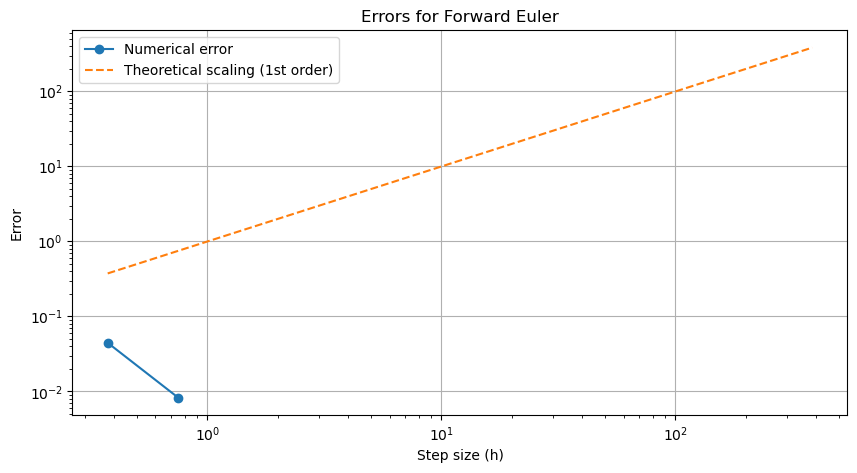


Experimental Order of Convergence (EOC) for Forward Euler:
Step size (h)   |   EOC
------------------------
0.7500000000    |   -2.427400
1.5000000000    |   inf
3.0000000000    |   nan
6.0000000000    |   nan
12.0000000000   |   nan
24.0000000000   |   nan
48.0000000000   |   nan
96.0000000000   |   nan
192.0000000000  |   nan
384.0000000000  |   nan

Heun Method:


C:\Users\Rowan\AppData\Local\Temp\ipykernel_15656\3654609394.py:12: RuntimeWarning: overflow encountered in scalar multiply
  return -(1 + t) * y**2


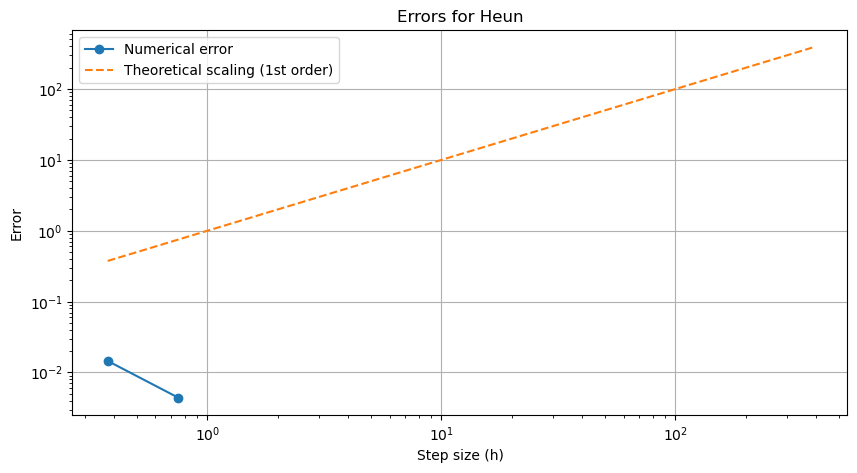


Experimental Order of Convergence (EOC) for Heun:
Step size (h)   |   EOC
------------------------
0.7500000000    |   -1.720357
1.5000000000    |   inf
3.0000000000    |   nan
6.0000000000    |   nan
12.0000000000   |   nan
24.0000000000   |   nan
48.0000000000   |   nan
96.0000000000   |   nan
192.0000000000  |   nan
384.0000000000  |   nan


In [7]:
# Increment functions for Forward Euler and Heun methods
def forward_euler_increment(t, y, f, h):
    return h * f(t, y)

def heun_increment(t, y, f, h):
    k1 = f(t, y)
    k2 = f(t + h, y + h * k1)
    return h * (k1 + k2) / 2

# Derivative function for the ODE
def f(t, y):
    return -(1 + t) * y**2

# Function to compute errors and EOCs for a given method
def compute_errors_and_eocs(method, f, Phi):
    # Parameters
    N0 = 4
    T = 1.5
    K = 10

    # Step sizes and number of steps
    hs = T / N0 * 2**np.arange(K + 1)
    Ns = N0 * 2**np.arange(K + 1)

    # Compute errors for each step size
    errors = [lastError(f, Phi, h, N) for h, N in zip(hs, Ns)]

    # Compute experimental order of convergence (EOC)
    eocs = EOC(hs, errors)

    return hs, errors, eocs

# Main function to plot errors and EOCs
def plot_errors_and_eocs(method_name, f, Phi):
    # Compute errors and EOCs
    hs, errors, eocs = compute_errors_and_eocs(method_name, f, Phi)

    # Plot errors
    plt.figure(figsize=(10, 5))
    plt.loglog(hs, errors, marker='o', linestyle='-', label='Numerical error')
    plt.loglog(hs, hs, linestyle='--', label='Theoretical scaling (1st order)')
    plt.title(f'Errors for {method_name}')
    plt.xlabel('Step size (h)')
    plt.ylabel('Error')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Print EOCs
    print(f'\nExperimental Order of Convergence (EOC) for {method_name}:')
    print('Step size (h)   |   EOC')
    print('------------------------')
    for i in range(1, len(hs)):
        print(f'{hs[i]:<15.10f} |   {eocs[i]:.6f}')


# Plot errors and EOCs for Forward Euler method
print("\nForward Euler Method:")
plot_errors_and_eocs("Forward Euler", f, forward_euler_increment)

# Plot errors and EOCs for Heun method
print("\nHeun Method:")
plot_errors_and_eocs("Heun", f, heun_increment)

## 4.9)a)
The first function below computes the increment function for a generic explicit Runge-Kutta method., with A as the coefficient matrix, and b and c as the other vectors. Then the three methods are defined, a function for the ODE given and the errors are computed and plotted for given parameters.

C:\Users\Rowan\AppData\Local\Temp\ipykernel_15656\1958007120.py:45: RuntimeWarning: overflow encountered in square
  return -(1 + t) * y**2
C:\Users\Rowan\AppData\Local\Temp\ipykernel_15656\1958007120.py:10: RuntimeWarning: invalid value encountered in add
  u_i += h * A[i, j] * k[j].astype(np.float64)  # Convert k[j] to float64


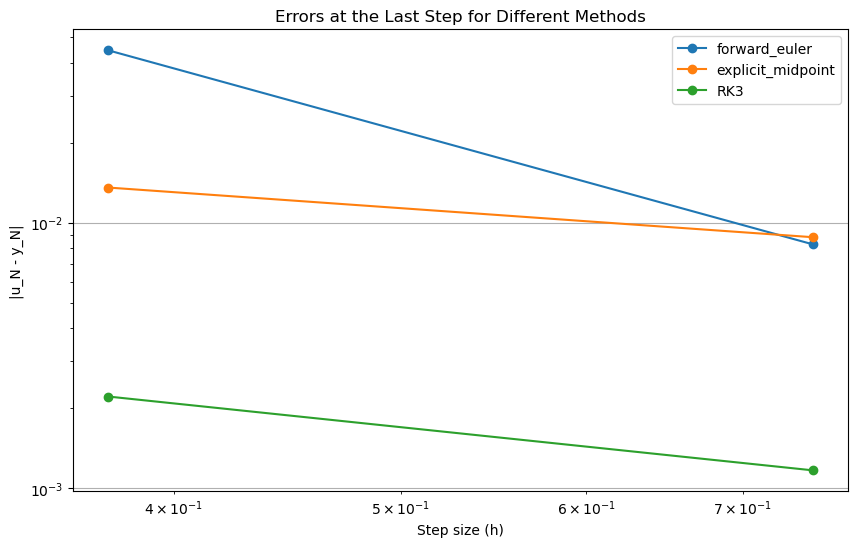

In [8]:
def explicitRK(t, u, f, h, A, b, c):
    s = len(b)  # Number of stages

    k = np.zeros((s, len(u)))  # Initialize increment vector

    for i in range(s):
        t_i = t + c[i] * h
        u_i = u.copy().astype(np.float64)  # Convert u_i to float64
        for j in range(i):
            u_i += h * A[i, j] * k[j].astype(np.float64)  # Convert k[j] to float64
        k[i] = f(t_i, u_i)

    delta_u = np.dot(b, k) * h
    return delta_u

# Forward Euler method
def forward_euler(t, u, f, h):
    s = 1
    A = np.zeros((s, s))
    b = np.array([1])
    c = np.array([0])
    return explicitRK(t, u, f, h, A, b, c)

# Explicit Midpoint method
def explicit_midpoint(t, u, f, h):
    s = 2
    A = np.array([[0, 0],
                  [1/2, 0]])
    b = np.array([0, 1])
    c = np.array([0, 1/2])
    return explicitRK(t, u, f, h, A, b, c)

# RK3 method
def RK3(t, u, f, h):
    s = 3
    A = np.array([[0, 0, 0],
                  [1/2, 0, 0],
                  [-1, 2, 0]])
    b = np.array([1/6, 2/3, 1/6])
    c = np.array([0, 1/2, 1])
    return explicitRK(t, u, f, h, A, b, c)

# Derivative function for the ODE
def f(t, y):
    return -(1 + t) * y**2

# Exact solution of the ODE
def exact_solution(t):
    return 2 / (t**2 + 2*t + 2)

# Function to compute errors for a given method
def compute_error(method, f, h, N):
    t0 = 0
    u0 = np.array([1])
    u_N = evolve(t0, u0, f, method, h, N)
    y_N = exact_solution(t0 + N * h)
    return abs(u_N - y_N)

# Function to plot errors for all methods
def plot_errors(methods, f, hs, Ns):
    errors = {}
    for method in methods:
        errors[method.__name__] = [compute_error(method, f, h, N) for h, N in zip(hs, Ns)]

    plt.figure(figsize=(10, 6))
    for method_name, method_errors in errors.items():
        plt.loglog(hs, method_errors, marker='o', linestyle='-', label=method_name)

    plt.title('Errors at the Last Step for Different Methods')
    plt.xlabel('Step size (h)')
    plt.ylabel('|u_N - y_N|')
    plt.legend()
    plt.grid(True)
    plt.show()

# Parameters
N0 = 4
T = 1.5
K = 10

# Step sizes and number of steps
hs = T / N0 * 2**np.arange(K + 1)
Ns = N0 * 2**np.arange(K + 1)

# Methods to test
methods = [forward_euler, explicit_midpoint, RK3]

# Plot errors
plot_errors(methods, f, hs, Ns)

It seems that RK3 is much more accurate, however, the greater the step size, the more accuracte the forward euler methods becomes,, eventually becoming more accurate the the explicit midpoint method.

## 4.9)b)
The code below defines a function that implements the increment function for 
a generic diagonally implicit Runge-Kutta method through solving F(x) approximately and uses that to implement the implicit midpoint and crouzeix methods which are defined below. Then the errors for these are plotted for comparison.s

In [ ]:
from scipy.optimize import root_scalar

def DIRK(t, u, f, h, A, b, c):
    s = len(b)  # Number of stages
    k = np.zeros((s, len(u)))  # Initialize increment vector
    
    for i in range(s):
        t_i = t + c[i] * h
        u_i = u.copy()
        for j in range(i):
            u_i += h * A[i, j] * k[j]
        
        def F(x):
            return x - f(t_i, u_i + h * np.dot(A[i, :i], k[:i]) + h * A[i, i] * x)
        
        # Initialize a bracket
        a, b = -1.0, 1.0
        while True:
            if F(a) * F(b) < 0:
                root = root_scalar(F, bracket=(a, b))
                break
            else:
                a *= 0.1
                b *= 10.0
        
        k[i] = root.root
    
    delta_u = np.dot(b, k) * h
    return delta_u

# Define the coefficient matrices A, weight vectors b, and node vectors c for the methods
A_imp_midpoint = np.array([[0.5]])
b_imp_midpoint = np.array([1.0])
c_imp_midpoint = np.array([0.5])

A_crouzeix = np.array([[0.5 + (3 ** 0.5) / 6, 0], [ -(3 ** 0.5) / 3, 0.5 + (3 ** 0.5) / 6]])
b_crouzeix = np.array([0.5, 0.5])
c_crouzeix = np.array([0.5 + (3 ** 0.5) / 6, 0.5 - (3 ** 0.5) / 6])

# Define the methods using DIRK function
implicit_midpoint = lambda t, u, f, h: DIRK(t, u, f, h, A_imp_midpoint, b_imp_midpoint, c_imp_midpoint)
crouzeix = lambda t, u, f, h: DIRK(t, u, f, h, A_crouzeix, b_crouzeix, c_crouzeix)

# Adjust the convergence study to use the methods correctly
methods = [implicit_midpoint, crouzeix]

# Rerun the convergence study with the adjusted parameters
plot_errors(methods, f, hs, Ns)

C:\Users\Rowan\AppData\Local\Temp\ipykernel_15656\1958007120.py:45: RuntimeWarning: overflow encountered in multiply
  return -(1 + t) * y**2
C:\Users\Rowan\AppData\Local\Temp\ipykernel_15656\1958007120.py:45: RuntimeWarning: overflow encountered in square
  return -(1 + t) * y**2
